# Phase Hamiltonian Mapper I

## Use Sympy to map objective functions into Hamiltonians consisting of pauli matrices.

In [1]:
# Import Sympy and all it libraries
from sympy import *

### Using Sympy we have to define certain structure in order to get the Hamiltonian mapped correctly
### The objective function should be defined with a variable list and the function itself
### For example:

In [2]:
expr = '(x_l*x_m)*(x_i*x_j)'
var = ['x_i', 'x_j', 'x_l','x_m']
sympify(expr)

x_i*x_j*x_l*x_m

### Firstly we need ot check if the variables in the list matches those in given  in  the objective function:

In [3]:
for v in var:
            if(v in expr):
                pass
            else:
                raise ValueError('Variables Mismatch! Unable to find {} in the Objective Function: {}'.format(v, expr))

### Then we need to define the Pauli matrices and the Identity Matrices based on the number variables there are:

In [4]:
# init function
I = symbols('I')
Z = []
X = []
Y = []

# Next we define the pauli Z:
for i in range(len(var)):
    Z.append(symbols('Z_{}'.format(var[i][len(var[i])-1])))
    Y.append(symbols('Y_{}'.format(var[i][len(var[i])-1])))
    X.append(symbols('Y_{}'.format(var[i][len(var[i])-1])))

### Since for each x term we substitute it with 1/2(I - Z) term but first we need to convert the expression into a sympy

In [5]:
sym_expr = sympify(expr)

for i in range(len(var)):
    s_term = (1/2)*(I - Z[i])
    sym_expr = sym_expr.subs(var[i],s_term)
    

sym_expr = expand(sym_expr)
sym_expr

0.0625*I**4 - 0.0625*I**3*Z_i - 0.0625*I**3*Z_j - 0.0625*I**3*Z_l - 0.0625*I**3*Z_m + 0.0625*I**2*Z_i*Z_j + 0.0625*I**2*Z_i*Z_l + 0.0625*I**2*Z_i*Z_m + 0.0625*I**2*Z_j*Z_l + 0.0625*I**2*Z_j*Z_m + 0.0625*I**2*Z_l*Z_m - 0.0625*I*Z_i*Z_j*Z_l - 0.0625*I*Z_i*Z_j*Z_m - 0.0625*I*Z_i*Z_l*Z_m - 0.0625*I*Z_j*Z_l*Z_m + 0.0625*Z_i*Z_j*Z_l*Z_m

### Now we have to simpify the expressions by 
### 1. Multiplcation with the Identity Matrix
### 2. Remove any global factors/ Identity Matrix

In [6]:
sym_expr = sym_expr.subs(I,1)
coe = sym_expr.as_coefficients_dict()

g_phase = coe.get(1) # remove the global phase/values without Z terms
sym_expr = sym_expr - g_phase
sym_expr

0.0625*Z_i*Z_j*Z_l*Z_m - 0.0625*Z_i*Z_j*Z_l - 0.0625*Z_i*Z_j*Z_m + 0.0625*Z_i*Z_j - 0.0625*Z_i*Z_l*Z_m + 0.0625*Z_i*Z_l + 0.0625*Z_i*Z_m - 0.0625*Z_i - 0.0625*Z_j*Z_l*Z_m + 0.0625*Z_j*Z_l + 0.0625*Z_j*Z_m - 0.0625*Z_j + 0.0625*Z_l*Z_m - 0.0625*Z_l - 0.0625*Z_m

In [7]:
p_expr = Poly(sym_expr,Z)
qc_list = p_expr.monoms()
print(var)
qc_list

['x_i', 'x_j', 'x_l', 'x_m']


[(1, 1, 1, 1),
 (1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 1, 0, 0),
 (1, 0, 1, 1),
 (1, 0, 1, 0),
 (1, 0, 0, 1),
 (1, 0, 0, 0),
 (0, 1, 1, 1),
 (0, 1, 1, 0),
 (0, 1, 0, 1),
 (0, 1, 0, 0),
 (0, 0, 1, 1),
 (0, 0, 1, 0),
 (0, 0, 0, 1)]

### Now we make all of this into a python class to aid us with the generation of the Quantum circuit

In [8]:
import P_Hamil as ph

### Import the P_Hamil to aid with the construction of the circuit
### Define the Object Function and the variables:

In [9]:
obj = 'x_5 * ((x_1*x_2) + (x_3*x_4))'
var = ['x_1','x_2','x_3','x_4','x_5']

### Create an instance of the Phase Hamiltonian generator

In [16]:
pham = ph.P_Hamil(obj,var)

### To get the objective function:

In [17]:
pham.get_ObjFun()

x_5*(x_1*x_2 + x_3*x_4)

### In order to get the Hamiltonian as an expression of Pauli Matrix representation, we need to use the Hamify() function
### After which we can get the Phase/Cost Hamiltonian:

In [18]:
pham.Hamify()
pham.get_PHamil()

-0.125*Z_1*Z_2*Z_5 + 0.125*Z_1*Z_2 + 0.125*Z_1*Z_5 + 0.125*Z_1 + 0.125*Z_2*Z_5 + 0.125*Z_2 - 0.125*Z_3*Z_4*Z_5 + 0.125*Z_3*Z_4 + 0.125*Z_3*Z_5 + 0.125*Z_3 + 0.125*Z_4*Z_5 + 0.125*Z_4 + 0.25*Z_5

In [19]:
pham.get_QClist()

[(1, 1, 0, 0, 1),
 (1, 1, 0, 0, 0),
 (1, 0, 0, 0, 1),
 (1, 0, 0, 0, 0),
 (0, 1, 0, 0, 1),
 (0, 1, 0, 0, 0),
 (0, 0, 1, 1, 1),
 (0, 0, 1, 1, 0),
 (0, 0, 1, 0, 1),
 (0, 0, 1, 0, 0),
 (0, 0, 0, 1, 1),
 (0, 0, 0, 1, 0),
 (0, 0, 0, 0, 1)]

### The perqubitmap function aids with the direct mapping of variables in the objective function to individual qubits in the Quantum Circuit:

In [20]:
qc = pham.perQubitMap(1.22222,p=1)

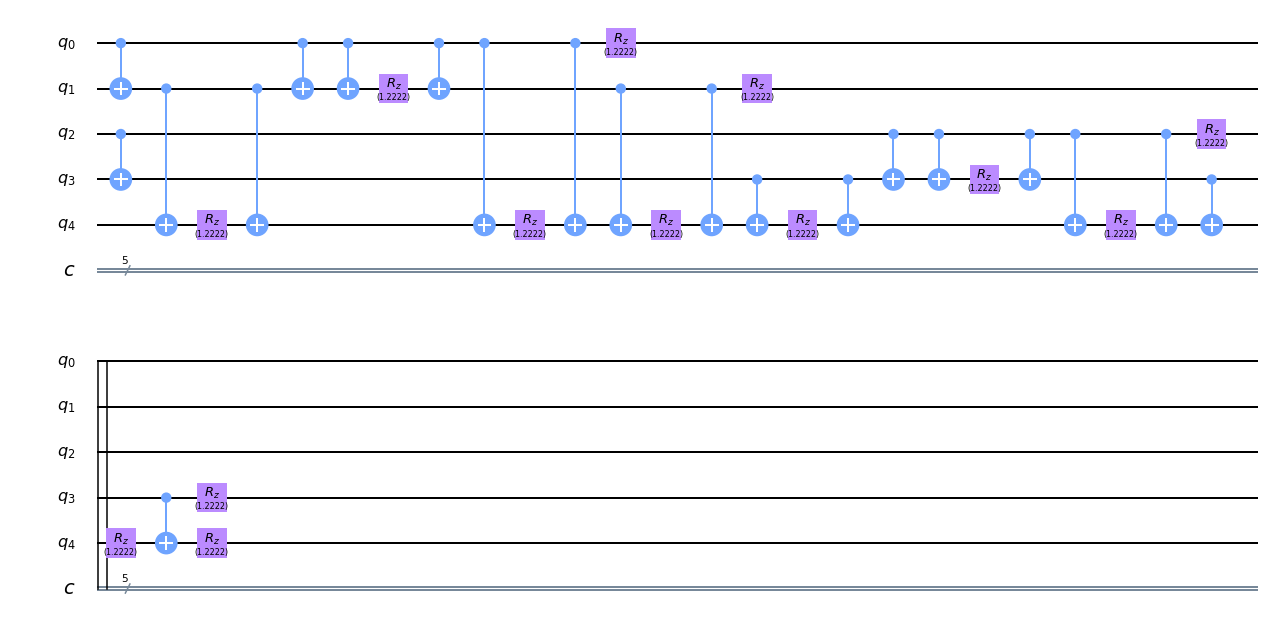

In [21]:
pham.drawCircuit(output='mpl')